In [1]:


import os
from dotenv import load_dotenv
# Load the .env file which contains the API keys
load_dotenv()

# Set the API keys as environment variables
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ['LANGCHAIN_TRACING_V2']= 'true'
os.environ['LANGCHAIN_API_KEY'] = os.getenv('LANGCHAIN_API_KEY')
# Optional, add tracing in LangSmith.
# This will help you visualize and debug the control flow
# os.environ["LANGCHAIN_TRACING_V2"] = "true"
# os.environ["LANGCHAIN_PROJECT"] = "Agentic_RAG_LANGGRAPH"


# Now you can use the API key within this notebook

In [4]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph
from langgraph.prebuilt import chat_agent_executor
model = ChatOpenAI(temperature=0)

graph = MessageGraph()

graph.add_node("oracle", model)
graph.add_edge("oracle", END)

graph.set_entry_point("oracle")

runnable = graph.compile()

In [3]:
runnable.invoke(HumanMessage("What is langchain?"))


[HumanMessage(content='What is langchain?'),
 AIMessage(content='Langchain is a blockchain-based platform that aims to revolutionize the language learning industry by providing a decentralized marketplace for language learners and teachers to connect and exchange services. The platform uses smart contracts to facilitate secure and transparent transactions, and also offers features such as language assessment tools, personalized learning plans, and community forums for users to interact and collaborate.', response_metadata={'finish_reason': 'stop', 'logprobs': None})]

In [6]:
from IPython.display import Image


In [8]:
Image(graph.draw_png())

AttributeError: 'MessageGraph' object has no attribute 'draw_png'

In [12]:
runnable.get_graph().print_ascii()

NameError: name 'app' is not defined

In [18]:
import graph_util as util
img = util.visulize_graph(runnable)
# Image(runnable.get_graph().draw_png())


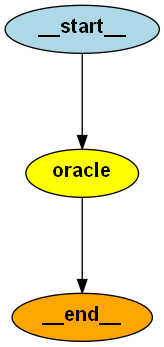

In [19]:
img